In [ ]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from utils.util import *
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set_context("talk")

In [ ]:
ctx_order = 'last'
ctx_order_str = 'ctxL'
analyze_name = 'analyze_regression_exc'

In [ ]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results = pickle.load(f)

with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

In [ ]:
mlp_runs     = dict_to_list(mlp_results, analyze_name)
rnn_runs     = dict_to_list(rnn_results, analyze_name)
rnncell_runs = dict_to_list(rnncell_results, analyze_name)
swmlp_runs   = dict_to_list(swmlp_results, analyze_name)
mlp_runs.keys()

dict_keys(['excluded_states', 'p_vals', 't_vals', 'params', 'bses'])

In [ ]:

param_mlp = np.asarray(mlp_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_mlp = np.asarray(mlp_runs['p_vals'])

param_rnn = np.asarray(rnn_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnn = np.asarray(rnn_runs['p_vals'])

param_rnncell = np.asarray(rnncell_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnncell = np.asarray(rnncell_runs['p_vals'])

param = np.asarray(swmlp_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val = np.asarray(swmlp_runs['p_vals'])

runs, checkpoints, n_states, ncoef = np.asarray(param_mlp).shape
print('runs, checkpoints, n_states, ncoef: ', runs, checkpoints, n_states, ncoef)
param_swmlp = np.zeros([runs, checkpoints, 2, n_states, ncoef])
p_val_swmlp = np.zeros([runs, checkpoints, 2, n_states, ncoef])
for r in range(runs):
    for cp in range(checkpoints):
        param_swmlp[r,cp,:,:] = param[r,cp]
        p_val_swmlp[r,cp,:,:] = p_val[r,cp]

runs, checkpoints, n_states, ncoef:  20 21 18 3


- Each plot shows the regression results after excluding that state
- e.g, plot for state0, means when we exclude idx0 which is (0,0) from the pairs and then did the regression, how the results look like

# Only RNN - 4X4 plot
- only last checkpoint (last step in training)
- all runs
- each state would be in that 4X4
- for when excluded two (0,0) and (3,3) (idx 0 and idx15), 
- and for when excluded all corners (0,0), (3,3), (0,3), (3,0) (idx: 0, 15, 3, 12)
- plot two other figs

In [ ]:
from itertools import permutations
locs = [(i,j) for i in range(4) for j in range(4)]
idxs = [i for i in range(len(locs))]
idx2loc = {idx:loc for idx, loc in zip(idxs,locs)}

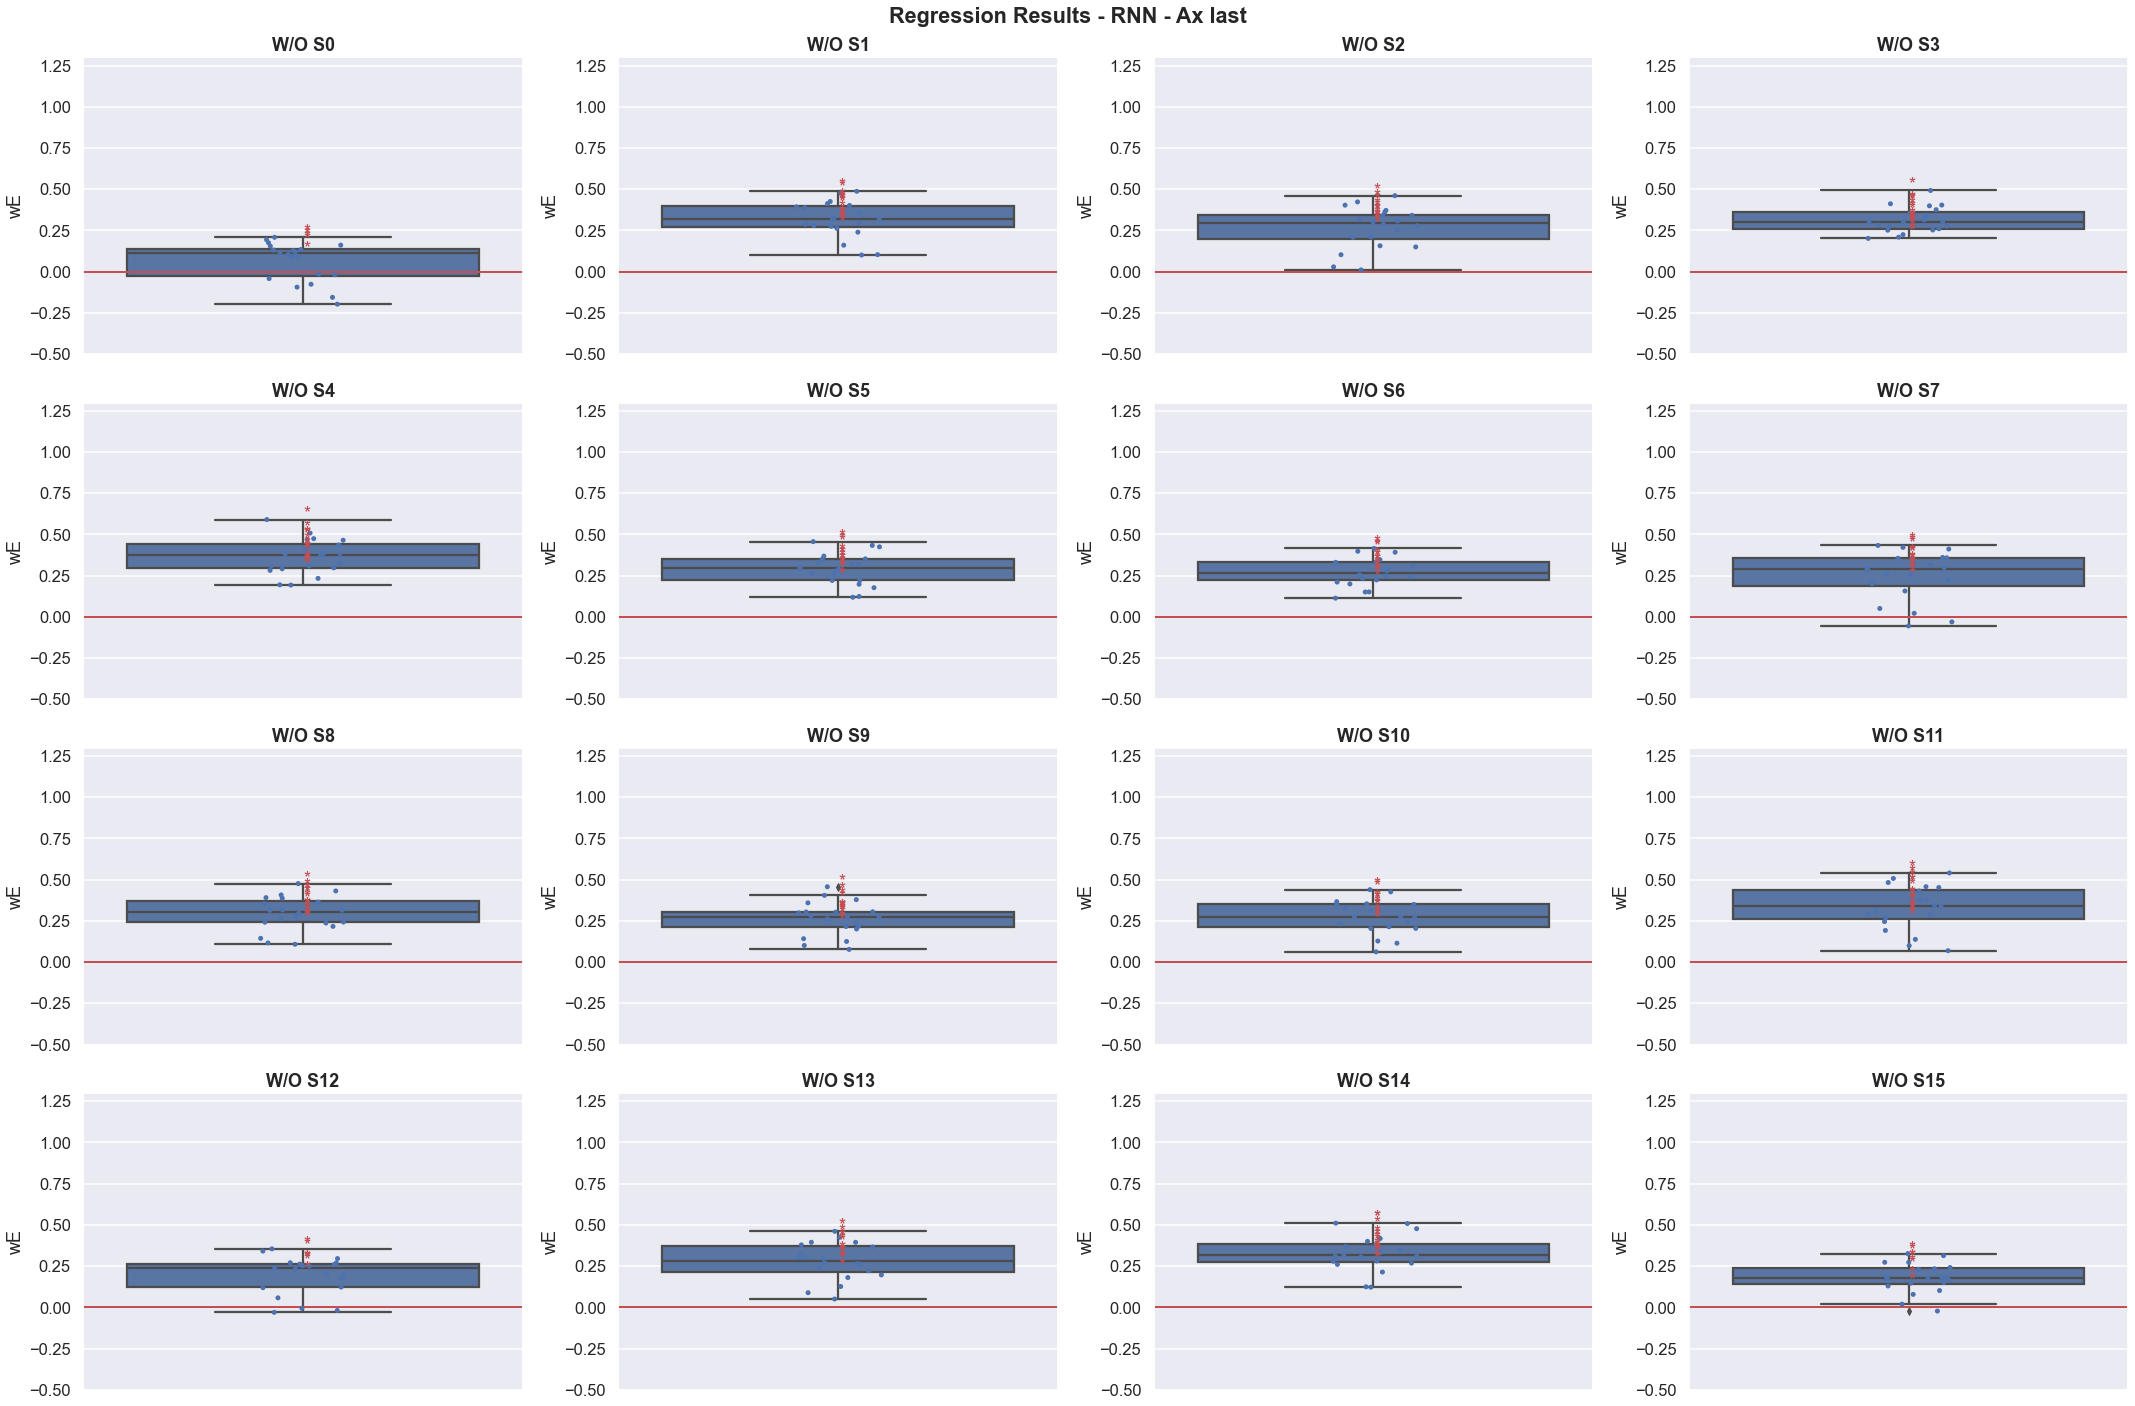

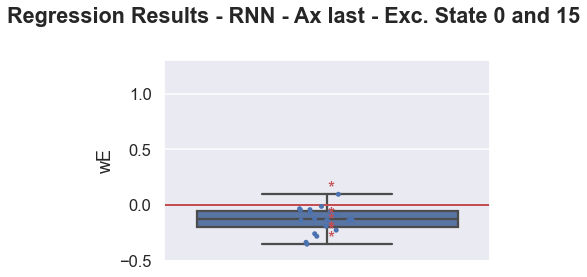

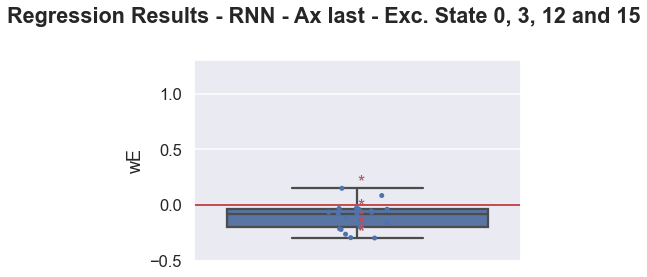

In [ ]:
checkpoints = 1 #param_rnn.shape[1]

fig, axs = plt.subplots(4, 4, figsize=(30,20))
val_name = 'wE'
coef = 2
for state in range(n_states):
    # RNN
    val = param_rnn[:,-1,state,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='step', value_name=val_name)

    if state==16:
        fig2, ax = plt.subplots()
        fig2.suptitle('Regression Results - RNN - Ax %s - Exc. State 0 and 15' %(ctx_order), fontweight='bold')
    elif state==17:
        fig3, ax = plt.subplots()
        fig3.suptitle('Regression Results - RNN - Ax %s - Exc. State 0, 3, 12 and 15' %(ctx_order), fontweight='bold')
    else:
        # plot
        row, col = idx2loc[state][0], idx2loc[state][1]
        ax = axs[row][col]
        fig.suptitle('Regression Results - RNN - Ax %s' %(ctx_order), fontweight='bold')
        ax.set_title('W/O S%s' %(state), fontweight='bold')
    ax = sns.boxplot(x='step', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='step', y=val_name, data=df2, ax=ax)
    for i, p in enumerate(p_val_rnn[:,-1,state,coef]):
        s = '*' if p<0.05 else ' '
        ax.annotate(s, (0, param_rnn[i, -1, state, coef]), color='r')
    
    # ax.set_ylim([mi, mx])
    ax.axhline(y=0, color='r', linewidth=2)
    ax.set_ylim([-0.5, 1.3])
    ax.axes.xaxis.set_visible(False)
    plt.tight_layout()
    
fig_str = '%s_exc_allstates_reg_results_rnn_hidds' %(ctx_order_str)
fig2_str = '%s_exc_state0and15_reg_results_rnn_hidds' %(ctx_order_str)
fig3_str = '%s_exc_allcorners_reg_results_rnn_hidds' %(ctx_order_str)

fig.savefig(('../../figures/' + fig_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
fig2.savefig(('../../figures/' + fig2_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
fig3.savefig(('../../figures/' + fig3_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)

fig.savefig(('../../figures/' + fig_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
fig2.savefig(('../../figures/' + fig2_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
fig3.savefig(('../../figures/' + fig3_str + '.png'), bbox_inches = 'tight', pad_inches = 0)

# Truncated backprop - RNNCell

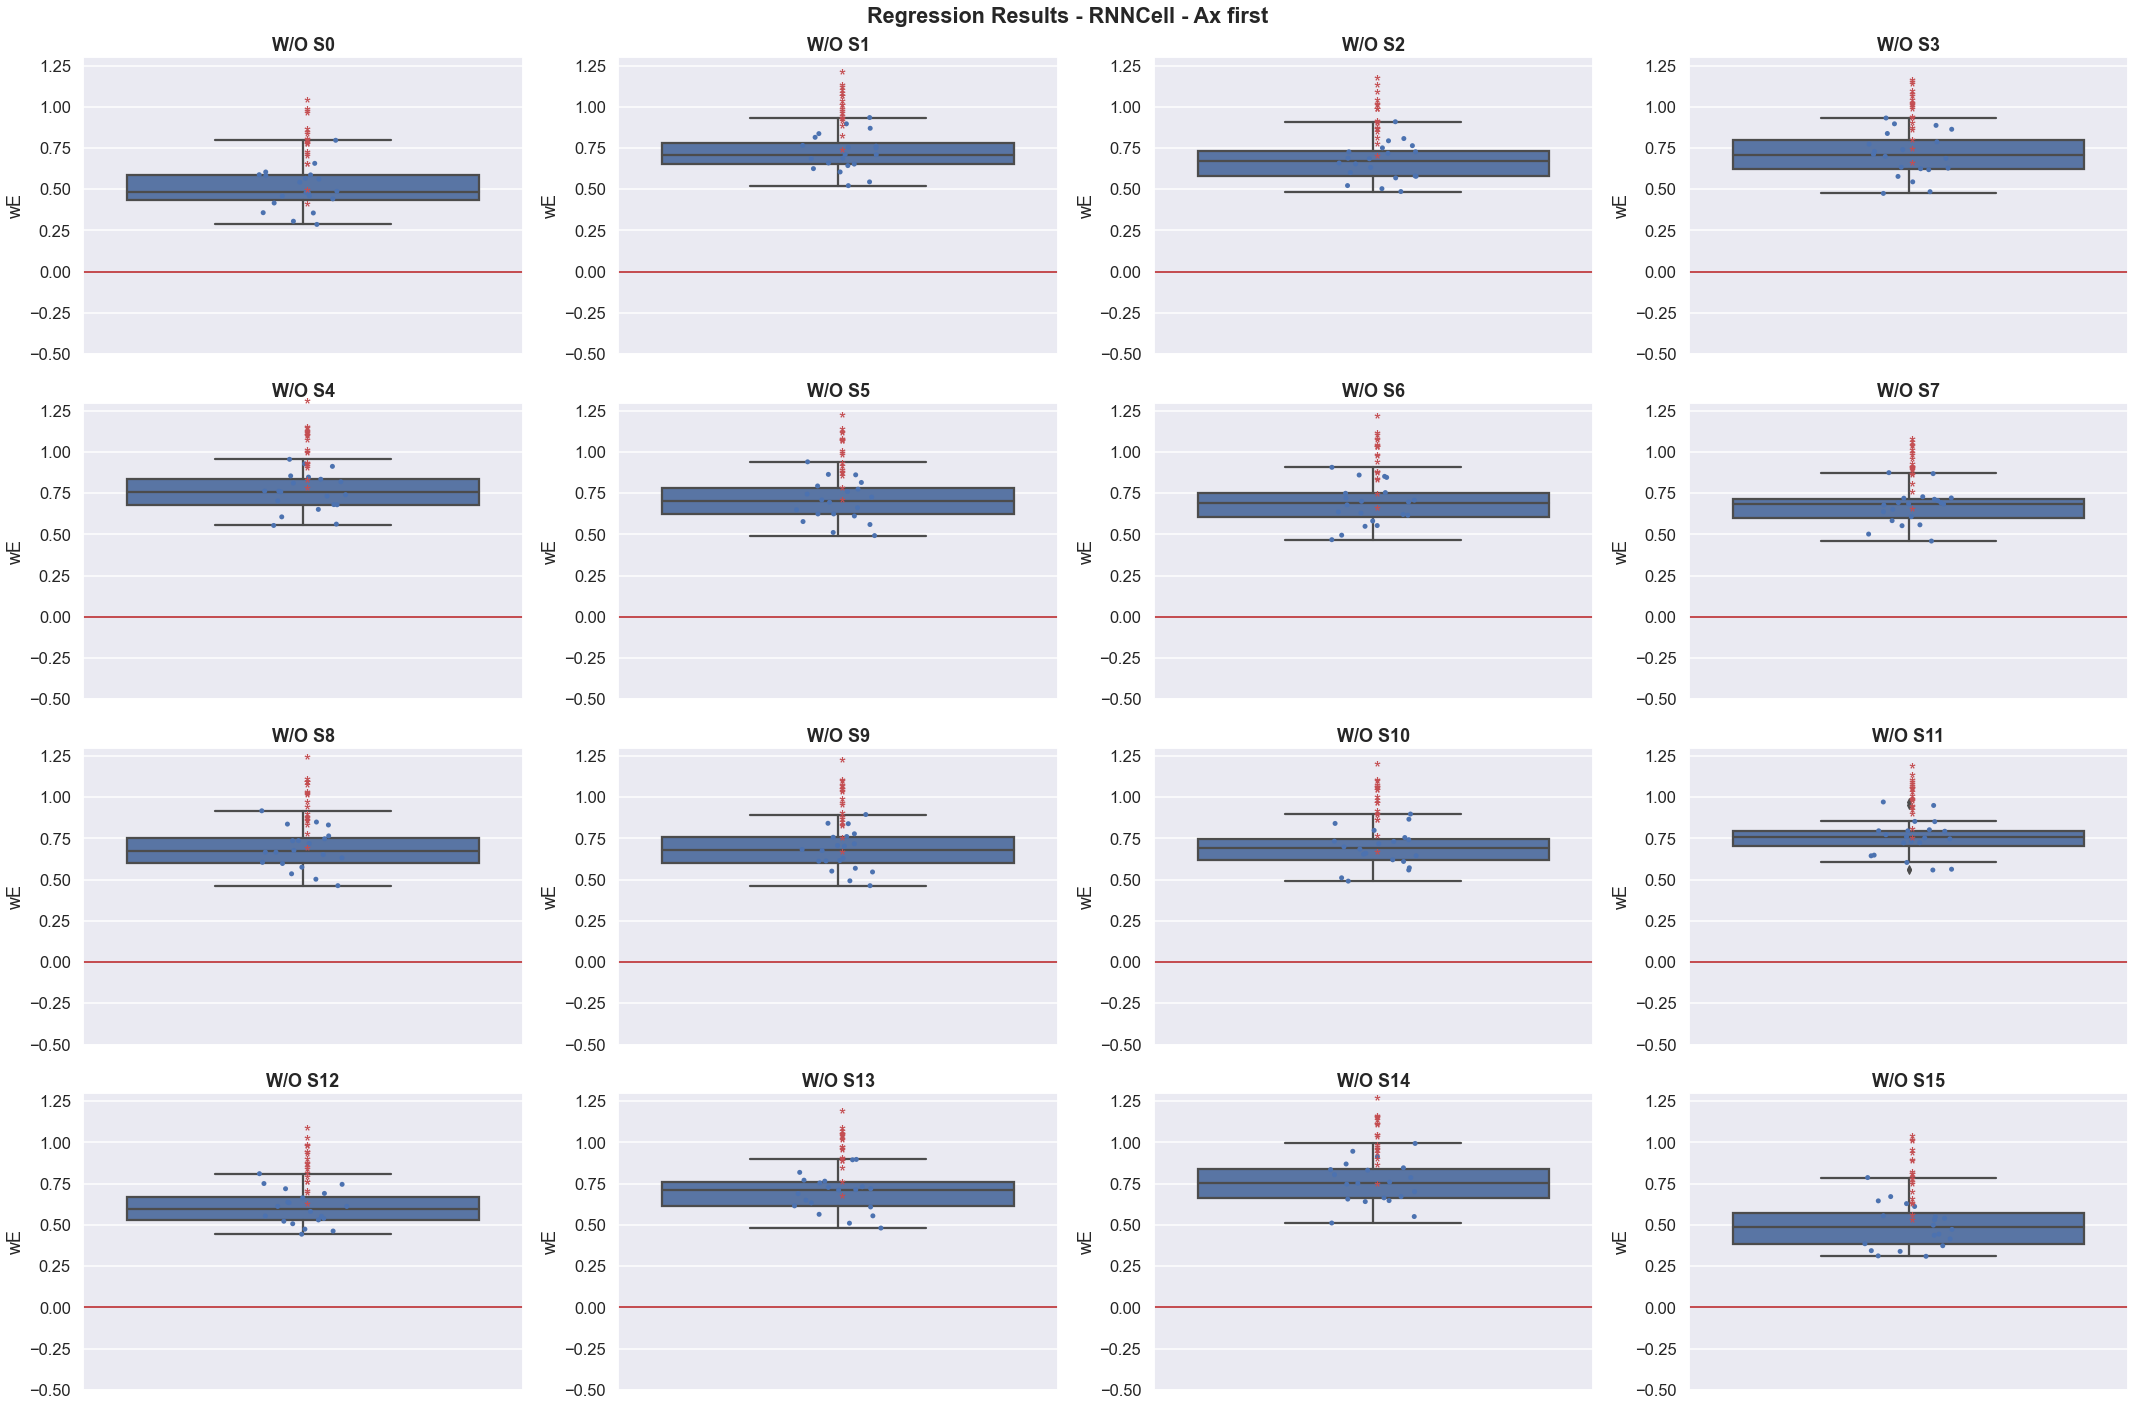

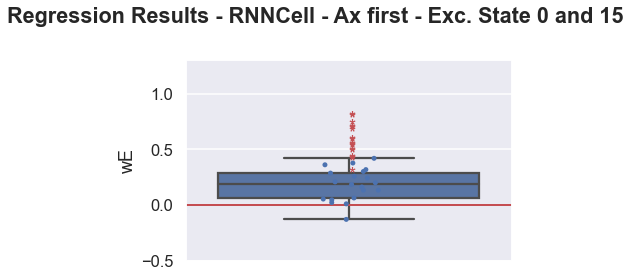

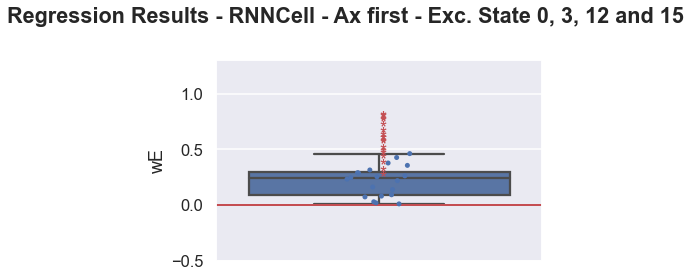

In [ ]:
checkpoints = 1 #param_rnn.shape[1]

fig, axs = plt.subplots(4, 4, figsize=(30,20))
val_name = 'wE'
coef = 2
for state in range(n_states):
    # RNN
    val = param_rnncell[:,-1,state,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='step', value_name=val_name)

    if state==16:
        fig2, ax = plt.subplots()
        fig2.suptitle('Regression Results - RNNCell - Ax %s - Exc. State 0 and 15' %(ctx_order), fontweight='bold')
    elif state==17:
        fig3, ax = plt.subplots()
        fig3.suptitle('Regression Results - RNNCell - Ax %s - Exc. State 0, 3, 12 and 15' %(ctx_order), fontweight='bold')
    else:
        # plot
        row, col = idx2loc[state][0], idx2loc[state][1]
        ax = axs[row][col]
        fig.suptitle('Regression Results - RNNCell - Ax %s' %(ctx_order), fontweight='bold')
        ax.set_title('W/O S%s' %(state), fontweight='bold')
    ax = sns.boxplot(x='step', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='step', y=val_name, data=df2, ax=ax)
    for i, p in enumerate(p_val_rnncell[:,-1,state,coef]):
        s = '*' if p<0.05 else ' '
        ax.annotate(s, (0, param_rnncell[i, -1, state, coef]), color='r')
    
    # ax.set_ylim([mi, mx])
    ax.axhline(y=0, color='r', linewidth=2)
    ax.set_ylim([-0.5, 1.3])
    ax.axes.xaxis.set_visible(False)
    plt.tight_layout()
    
fig_str = '%s_exc_allstates_reg_results_rnncell_hidds' %(ctx_order_str)
fig2_str = '%s_exc_state0and15_reg_results_rnncell_hidds' %(ctx_order_str)
fig3_str = '%s_exc_allcorners_reg_results_rnncell_hidds' %(ctx_order_str)

fig.savefig(('../../figures/' + fig_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
fig2.savefig(('../../figures/' + fig2_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
fig3.savefig(('../../figures/' + fig3_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)

fig.savefig(('../../figures/' + fig_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
fig2.savefig(('../../figures/' + fig2_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
fig3.savefig(('../../figures/' + fig3_str + '.png'), bbox_inches = 'tight', pad_inches = 0)